# Probability

## Infinite and Finite Probability

### Simulation of flipping coins 

In [1]:
# To fix the simulation result be reamin same we will set the seeds to 13579
set.seed(13579)

0. Setting the population probability in *Probability* variable.

In [2]:
# there are ony two values in flipping coin 0 and 1, hence {0,1} is the population of the flipping coin.
Population = c(0,1)

# setting the probability for the population.
Probability = c(0.5, 0.5)

1. The population probability is set in the variable Probability and the SampleSizes are created by using the seq function. The seq function creates a vectro of values from 100 to 1000 with intervals of 100.

In [3]:
# Creating sample size
SampleSizes = seq(100, 1000, 100)
SampleSizes

[1]  100  200  300  400  500  600  700  800  900 1000

2. Now we will create a SampleFreqs object and we will set it to NULL so that it may be constructed into a vector by appending values using the c function. 

In [4]:
# creating a SampleFreq object
SampleFreqs = NULL
SampleFreqs

NULL

3. A `for` loop iterates through all values within the SampleSizes vector assigning each value in turn to the SampleSize variable.
    * The SmapleFreqs vector is then increased by appending the sum of the samples of size SampleSize taken from the population of 0 and 1.

In [5]:
set.seed(13579)
count = 0

# first we will create a Errors Vector to sotre the errors
Errors = vector(length = length(SampleSizes))

for (SampleSize in SampleSizes){
    
    # making count variable to set the Samples on their position
    count = count + 1
    # Now SampleSize will hold the Size of the Samples one value in each iteration.
    
    # getting the Sample frequencies by using the smaple fucntion on the population.
    Sample = sample(x=Population, size= SampleSize, prob = Probability, replace = TRUE)
    
    # replace: to make the sample larger than the population we need to make it True.
    # x: Population vector from which we need to select 0 or 1 accoriding to the probability weight.'
    # size: sample size, a not-negative integer giving the number of items to choose.
    # prob: a vector of probaboility weights for obtaining the elements of the vector being smapled.
    
    
    # Now we will get the sum of the Sample and we will put into the SampelFreqs variable.
    SampleFreqs[count] = sum(Sample)
    
    # Calculating the errors
    Errors = RSampleFreqs - Probability[2]

}

ERROR: Error in eval(expr, envir, enclos): object 'RSampleFreqs' not found


4. SampleFreqs contians 0 or 1 in which 0 having the probability of 0.50 and 1 also having the probability of 0.50, since coin is unbiased.
    * Now we will devide the SampleFreq with Samplesize to get the relative sample frequecny.

In [6]:
# Now we will get the relative frequency
RSampleFreqs = SampleFreqs/SampleSizes

In [7]:
RSampleFreqs

[1] 0.52000000 0.26000000 0.17333333 0.13000000 0.10400000 0.08666667
 [7] 0.07428571 0.06500000 0.05777778 0.05200000

5. These relative frequencies are plotted with a line graph using the generic plot function.
    * Sample size is used for the data on the x-axis and SampleFreqs for the data on the y-axis.
    * Type = 'l' is used to draw the lines instead of the dot points.
    * ylim: is used to set the y-axis limits.

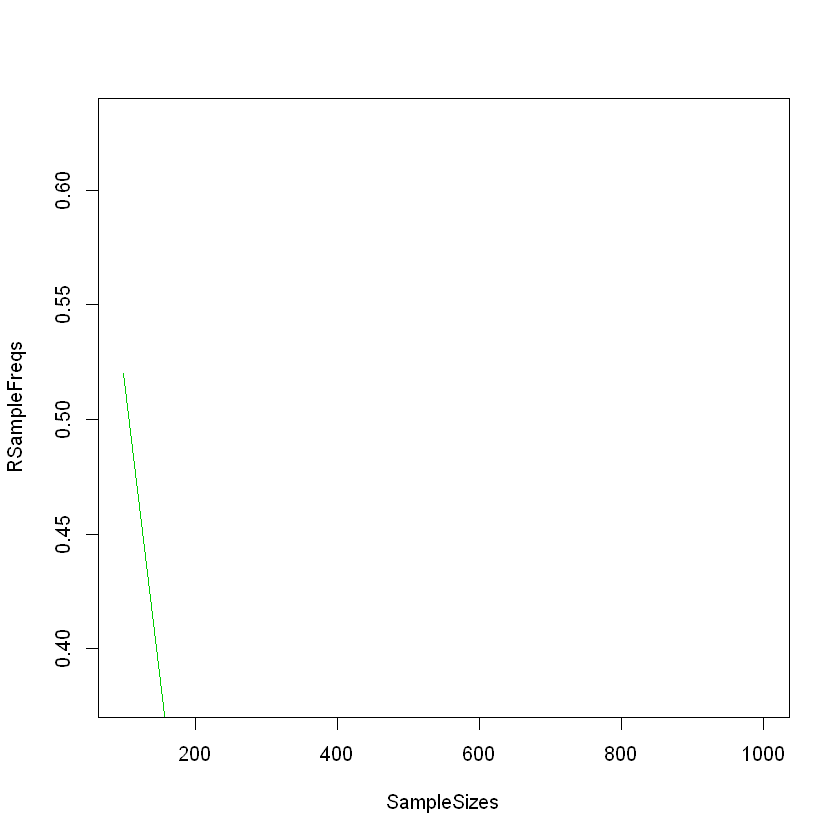

In [8]:
results = plot(x=SampleSizes, y=RSampleFreqs, type='l', ylim= c(0.38, 0.63), col=3)

6. Now we will construct a matrix containing SampleSize, realtive SampleFreq, Population Probability and Error.
    * We will use the rbind function to bind the rows.
    * we will make a row by uisng a cbind funciton.
    * we will use a for loop to construct the matrix fo values.

In [9]:
SampleSizes

[1]  100  200  300  400  500  600  700  800  900 1000

In [10]:
RSampleFreqs

[1] 0.52000000 0.26000000 0.17333333 0.13000000 0.10400000 0.08666667
 [7] 0.07428571 0.06500000 0.05777778 0.05200000

In [11]:
# Now we need to make a Population Probability vector containing the probability of having head
PProbability = vector(length = length(SampleSizes))
PProbability[1:10] = Probability[2]

# checking the probability
PProbability

[1] 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5

In [12]:
# checking the errors
Errors

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [13]:
# Now we will bind each column by using the cbind.
DataFrame = cbind(SampleSizes, RSampleFreqs, PProbability, Errors)

In [14]:
# checking the DataFrame
DataFrame

SampleSizes,RSampleFreqs,PProbability,Errors
100,0.52000000,0.5,0
200,0.26000000,0.5,0
300,0.17333333,0.5,0
400,0.13000000,0.5,0
500,0.10400000,0.5,0
600,0.08666667,0.5,0
700,0.07428571,0.5,0
800,0.06500000,0.5,0
900,0.05777778,0.5,0
1000,0.05200000,0.5,0


**Plotting the error vs sample size**

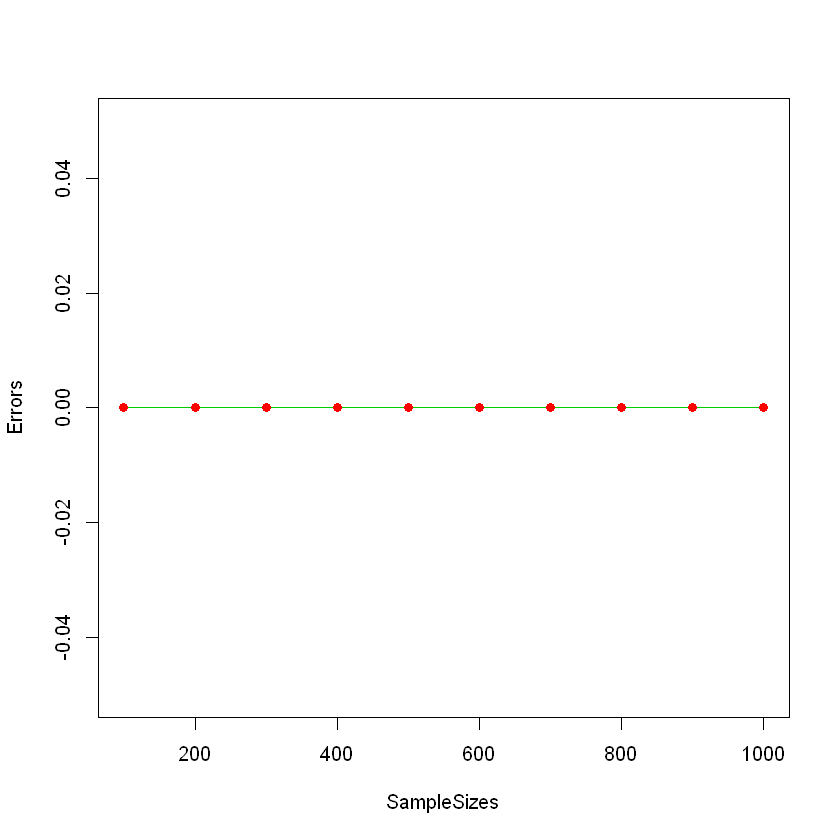

In [15]:
# plotting the Errors vs the Samplesizes
plot(x=SampleSizes, y=Errors, type="l", ylim = c(-0.05, 0.05) , col=3)

# Now we will plot the points over the plot by using the points
points(x=SampleSizes, y=Errors, col=2, pch=16)

#### Simulate a probability for 50 Smaples form 50 to 1000

* To do this exercise we will follow all the above steps and Now this time we will make a function which can be handle any number of sample.

* `Arguments required in function:`
    * Population
    * Probability
    * SampleSize
    * Sample range

In [16]:
ProbSim = function(Population, Probability, from=50, to=1000, SampleSize=50){
    
    # setting the seed to get the result same every time
    set.seed(135790)
    
    count = 0
    
    # first we need to make the sequence 
    SampleSizes = seq(from=from, to=to, SampleSize)
    
    # Making a vector for storing the relative sample frequency
    SampleFreqs = vector(length = length(SampleSizes))
    
     # probability vector 
    PProbability = vector(length = length(SampleSizes))
    
    # Now  we need to make the sample for  having head for each Sample Size by using for loop.
    
    # first we will create a Errors Vector to sotre the errors
    Errors = vector(length = length(SampleSizes))

    for (i in SampleSizes){

        # making count variable to set the Samples on their position
        count = count + 1
        # Now SampleSize will hold the Size of the Samples one value in each iteration.

        # getting the Sample frequencies by using the smaple fucntion on the population.
        Sample = sample(x=Population, size= i, prob = Probability, replace = TRUE)

        # replace: to make the sample larger than the population we need to make it True.
        # x: Population vector from which we need to select 0 or 1 accoriding to the probability weight.'
        # size: sample size, a not-negative integer giving the number of items to choose.
        # prob: a vector of probaboility weights for obtaining the elements of the vector being smapled.


        # Now we will get the sum of the Sample and we will put into the SampelFreqs variable.
        SampleFreqs[count] = sum(Sample)

       
        
        PProbability[count] = Probability[2]
       
    }
    # Now we will calculate the relative Sample frequency
    RSampleFreqs = SampleFreqs/SampleSizes
    # Calculating the errors
    Errors = RSampleFreqs - Probability[2]
    
    # Now we need to make a dataframe by using the cbind function
    
    Summary = cbind(SampleSizes, RSampleFreqs, PProbability, Errors)
    
    # Now we need to return the dataframe.
    Summary
    
}

In [17]:
plot.Freqs = function(Values){
    
    plot(RSampleFreqs ~ SampleSizes, data=Values, col=3, type='l')
    points(RSampleFreqs ~ SampleSizes, data=Values, col=2, pch=16, cex=0.5)
    abline(a=1, b=0, h=Values$PProbability[1], lty=2, col=4)
    
}

In [18]:
plot.Errors = function(Values){
    plot(Errors ~ SampleSizes, data=Values, col=3, type='l')
    points(Errors ~ SampleSizes, data=Values, col=2, pch=16, cex=0.5)
    abline(a=1, b=0, h=0.00, lty=2, col=4)
}

In [19]:
Summary = ProbSim(Population = c(0,1), Probability = c(0.5,0.5))
Summary = data.frame(Summary)

In [20]:
Summary

SampleSizes,RSampleFreqs,PProbability,Errors
50,0.5000000,0.5,0.000000000
100,0.4000000,0.5,-0.100000000
150,0.4333333,0.5,-0.066666667
200,0.4400000,0.5,-0.060000000
250,0.4520000,0.5,-0.048000000
300,0.4633333,0.5,-0.036666667
350,0.4885714,0.5,-0.011428571
400,0.4550000,0.5,-0.045000000
450,0.4822222,0.5,-0.017777778
500,0.4840000,0.5,-0.016000000


**plot b/w SampleSize and Probability**

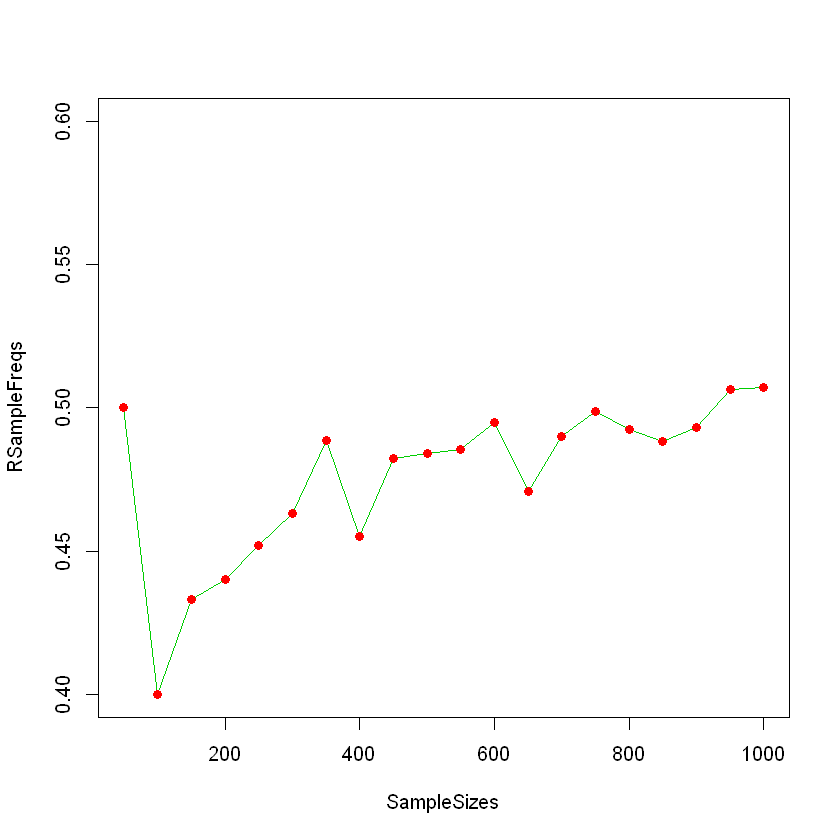

In [21]:
plot(RSampleFreqs ~ SampleSizes, data=Summary, col=3, type='l', ylim=c(0.40, 0.60))
points(RSampleFreqs ~ SampleSizes, data=Summary, col=2, pch=16)

**plot b/w SampleSize vs Errors.**

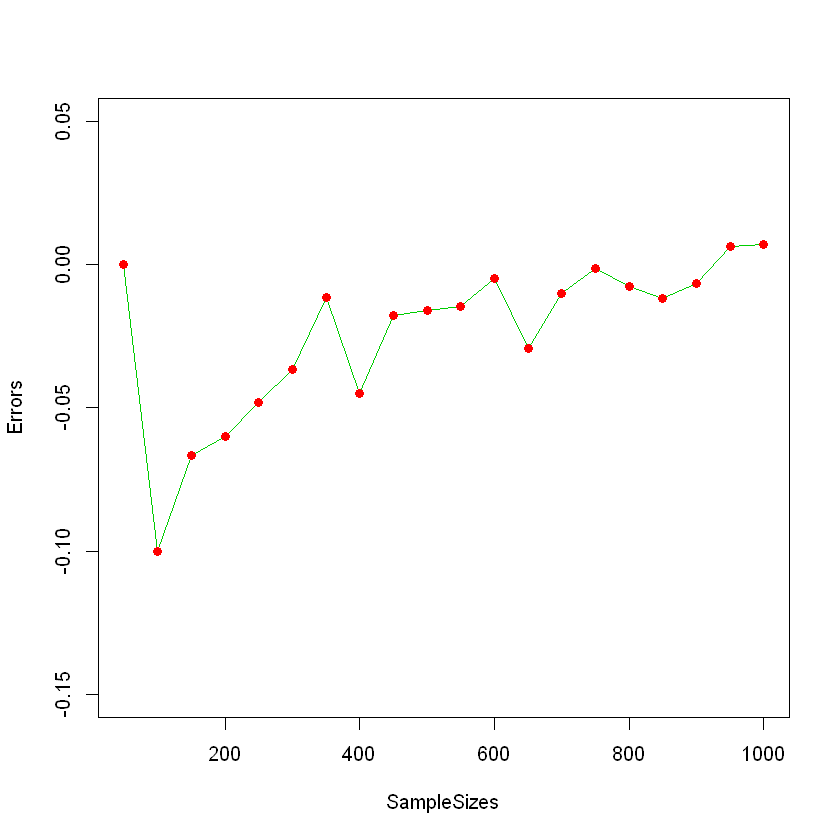

In [22]:
plot(Errors ~ SampleSizes, data=Summary, col=3, type='l', ylim=c(-0.15, 0.05))
points(Errors ~ SampleSizes, data=Summary, col=2, pch=16)

#### Simulating coin flipping for 50 sample size of from 1000 to 50000

In [23]:
Summary = ProbSim(Population = c(0,1), Probability = c(0.5,0.5), from=1000, to=50000, SampleSize=1000)
Summary = data.frame(Summary)
head(Summary)

SampleSizes,RSampleFreqs,PProbability,Errors
1000,0.4460000,0.5,-0.054000000
2000,0.4765000,0.5,-0.023500000
3000,0.4900000,0.5,-0.010000000
4000,0.5000000,0.5,0.000000000
5000,0.4912000,0.5,-0.008800000
6000,0.4971667,0.5,-0.002833333


**Plot b/w SampleSize and Relative Sample Frequencies**

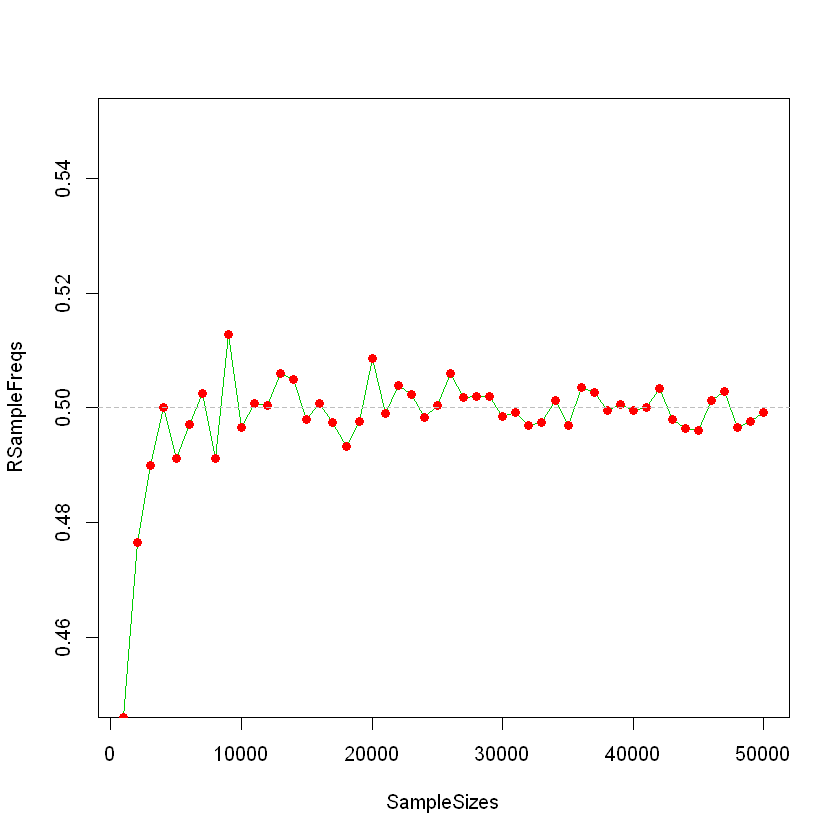

In [24]:
plot(RSampleFreqs ~ SampleSizes, data=Summary, col=3, type='l', ylim=c(0.45, 0.55))
points(RSampleFreqs ~ SampleSizes, data=Summary, col=2, pch=16)
abline(a=1, b=0, h=.50, lty=2, col=16)

**Plot b/w SampleSize and Errors**

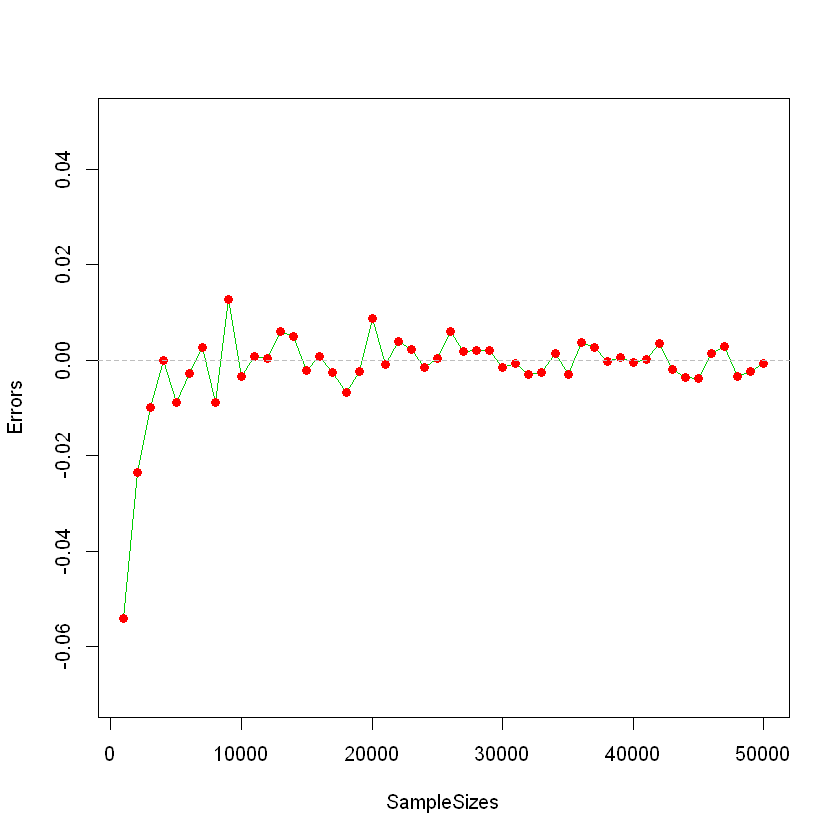

In [25]:
plot(Errors ~ SampleSizes, data=Summary, col=3, type='l', ylim=c(-0.07, 0.05))
points(Errors ~ SampleSizes, data=Summary, col=2, pch=16)
abline(a=1, b=0, h=0.00, lty=2, col=16)

**`Conclusion:` From the above simulation we can say that as the Samplesize increase or we can say that we flip coin million time then the probability of having head will become 0.50.**

___

### Biased coin with *p*=0.25

Now this time we have a biased coin with p=0.25 probability, in this case we will see the graph of relative Sample frequency.

In [26]:
Summary = ProbSim(Population = c(0,1), Probability = c(0.75,0.25), from=1000, to=500000, SampleSize = 1000)
Summary = data.frame(Summary)
head(Summary)

SampleSizes,RSampleFreqs,PProbability,Errors
1000,0.2540000,0.25,0.0040000000
2000,0.2690000,0.25,0.0190000000
3000,0.2573333,0.25,0.0073333333
4000,0.2447500,0.25,-0.0052500000
5000,0.2562000,0.25,0.0062000000
6000,0.2498333,0.25,-0.0001666667


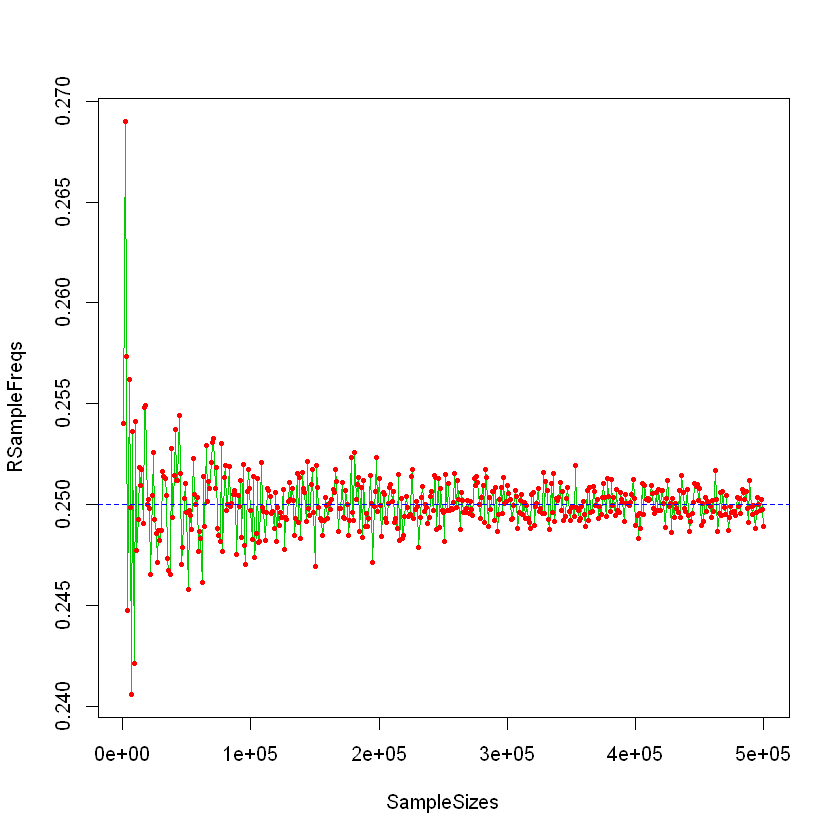

In [27]:
plot.Freqs(Summary)

### Baised coin with *p*=0.9

In [28]:
Summary = ProbSim(Population = c(0,1), Probability = c(0.1,0.9), from=1000, to=500000, SampleSize = 1000)
Summary = data.frame(Summary)
head(Summary)

SampleSizes,RSampleFreqs,PProbability,Errors
1000,0.9050000,0.9,0.005000000
2000,0.8960000,0.9,-0.004000000
3000,0.8990000,0.9,-0.001000000
4000,0.9057500,0.9,0.005750000
5000,0.9030000,0.9,0.003000000
6000,0.9031667,0.9,0.003166667


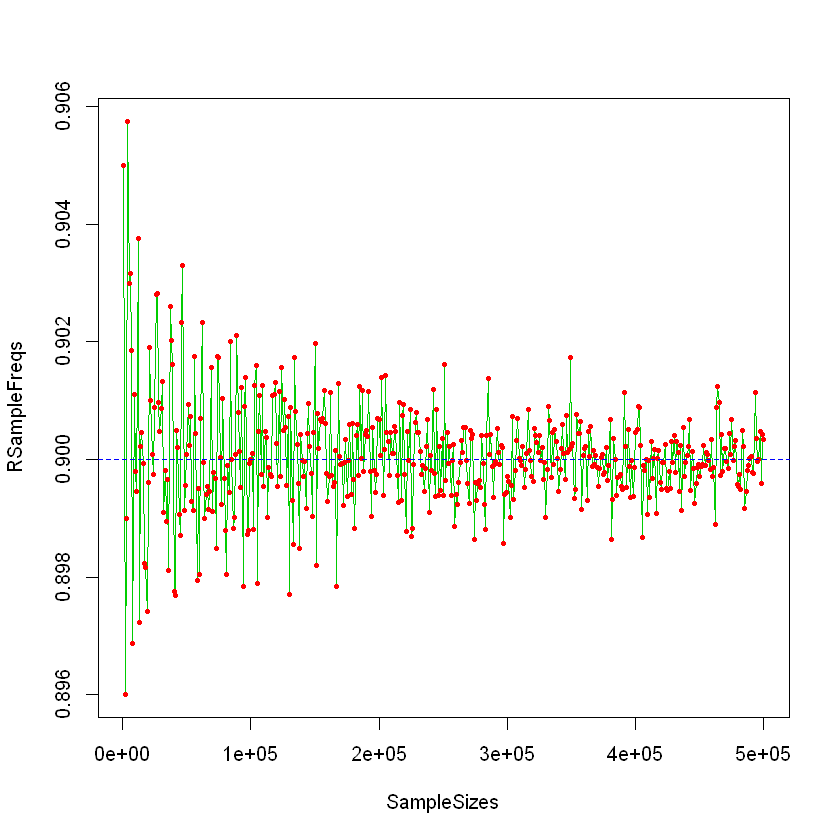

In [29]:
plot.Freqs(Summary)

___

## Joint Probability

In this section we will discuss about the joint probability by Simulating tossing of two coin and by checking their probability.

Tossing two coin will have events: {HH, TH, HT, TT} each having 1/4 probability if coins are fair.

if we encode the events with {0,1,2}, in this 0 shows no head, 1 shows 1 head, 2 shows having 2 head in a event. 

1. First we will define how many times we need to simulate the toss of coins. lets say we want to check the probability in 1000 to 50000 toss of coins having a siample size of 5000.

In [30]:
rm(SampleSizes)

In [31]:
SampleSizes = seq(1000, 50000, 2000)
SampleSizes

[1]  1000  3000  5000  7000  9000 11000 13000 15000 17000 19000 21000 23000
[13] 25000 27000 29000 31000 33000 35000 37000 39000 41000 43000 45000 47000
[25] 49000

2. Now we will generate two sample for each coin, this smaple will be the output of the events. each value will be the output of the event.

In [110]:

for (i in SampleSizes){
    # Generating the Samples for both coins
    Sample1 = sample(x=c(0,1), size= i, prob = c(0.50, 0.50), replace = TRUE)
    Sample2 = sample(x=c(0,1), size= i, prob = c(0.50, 0.50), replace = TRUE)
    
    # Now we need to bind them together by using the cbind method,
    Samples = cbind(Sample1, Sample2)
    
    # Now after combining we need to add them to make events.
    Samples$events = Sample1 + Sample2
    
    # Now we need to make a table which will count the 0, 1, 2 events apperance.
    Events = table(Samples$events)
    
    # Now this events contains the appearacne of each event, by dividing it with the number
    # of tosses or Samplesize we can get the relative frequency or the probability.
    
    if (!exists('SampleData')){
        SampleData = rbind(c(SampleSize=i, Events))
    }
    else{
        SampleData = rbind(SampleData,c(SampleSize=i, Events))
    }
    
    
}


Warning message in Samples$events <- Sample1 + Sample2:
"Coercing LHS to a list"Warning message in Samples$events <- Sample1 + Sample2:
"Coercing LHS to a list"Warning message in Samples$events <- Sample1 + Sample2:
"Coercing LHS to a list"Warning message in Samples$events <- Sample1 + Sample2:
"Coercing LHS to a list"Warning message in Samples$events <- Sample1 + Sample2:
"Coercing LHS to a list"Warning message in Samples$events <- Sample1 + Sample2:
"Coercing LHS to a list"Warning message in Samples$events <- Sample1 + Sample2:
"Coercing LHS to a list"Warning message in Samples$events <- Sample1 + Sample2:
"Coercing LHS to a list"Warning message in Samples$events <- Sample1 + Sample2:
"Coercing LHS to a list"Warning message in Samples$events <- Sample1 + Sample2:
"Coercing LHS to a list"Warning message in Samples$events <- Sample1 + Sample2:
"Coercing LHS to a list"Warning message in Samples$events <- Sample1 + Sample2:
"Coercing LHS to a list"Warning message in Samples$events <- Sam

In [51]:
CoinSim = function(Population = c(0,1), Probability = c(0.5,0.5), from=1000, to=50000, SampleSize=2000){
    
    # Generating the Sample Size for tossing of coins.
    SampleSizes = seq(from, to, SampleSize)
    
    for (i in SampleSizes){
    # Generating the Samples for both coins
    Sample1 = sample(x=c(0,1), size= i, prob = c(0.50, 0.50), replace = TRUE)
    Sample2 = sample(x=c(0,1), size= i, prob = c(0.50, 0.50), replace = TRUE)
    
    # Now we need to bind them together by using the cbind method,
    Samples = cbind(Sample1, Sample2)
    Samples = data.frame(Samples)
    # Now after combining we need to add them to make events.
    Samples$events = Samples$Sample1 + Samples$Sample2
    
    # Now we need to make a table which will count the 0, 1, 2 events apperance.
    Events = table(Samples$events)
    
    # Now this events contains the appearacne of each event, by dividing it with the number
    # of tosses or Samplesize we can get the relative frequency or the probability.
    
    if (!exists('SampleData')){
            SampleData = rbind(c(SampleSize=i, Events/i))
        # here i is the number of Samplesize
        }
    
    else{
            SampleData = rbind(SampleData,c(SampleSize=i, Events/i))
        }
    
    
    }
    
    SampleData
}

In [52]:
result = CoinSim(from=50, to=10000, SampleSize=50)

In [53]:
head(result)

SampleSize,0,1,2
50,0.2800000,0.5200000,0.20
100,0.2600000,0.4900000,0.25
150,0.2533333,0.4866667,0.26
200,0.2000000,0.5600000,0.24
250,0.2040000,0.5160000,0.28
300,0.2766667,0.4833333,0.24


**ploting the SampleSize vs relative frequency for each event.**

In [ ]:
# Plot SampleSize vs event 0
#par(mfrow= c(3,1))

# Plotting for event 0 or TT
plot(x=result[,'SampleSize'], y=result[,'0'] ,type='l', xlab='SampleSize', ylab='TT', col=3)
points(x=result[,'SampleSize'], y=result[,'0'], col=2, cex=0.50,pch=16)
abline(a=1, b=0, h=0.25, lty=2, col=16)

# Plotting for event 1 or HT + TH
plot(x=result[,'SampleSize'], y=result[,'1'] ,type='l', xlab='SampleSize', ylab='HT + TH', col=3)
points(x=result[,'SampleSize'], y=result[,'1'], col=2, cex=0.50,pch=16)
abline(a=1, b=0, h=0.50, lty=2, col=16)

# Plotting for event 2 or HH
plot(x=result[,'SampleSize'], y=result[,'2'] ,type='l', xlab='SampleSize', ylab='HH', col=3)
points(x=result[,'SampleSize'], y=result[,'2'], col=2, cex=0.50,pch=16)
abline(a=1, b=0, h=0.25, lty=2, col=16)

In [ ]:
Cols = colnames(result)[-1]
for (i in Cols){
    print(paste("mean probability of ",i,": ",mean(result[,i])))
}

In [ ]:
hist(result[,'0'], density=20, breaks=50, xlab="p(TT)", main="Probability of having no Head",,col=3)
abline(b=1,v=mean(result[,'0']), col=2, lwd=2, lty=2)

In [ ]:
mean(result[,'1'])

In [ ]:
mean(result[,'2'])

In [ ]:
CoinSim = function(Population = c(0,1), Probability = c(0.5,0.5), from=1000, to=50000, SampleSize=2000,
                  SampleRepeat=1, SampleName='Sample'){
    
    # Generating the Sample Size for tossing of coins.
    SampleSizes = seq(from, to, SampleSize)
    
    for (i in SampleRepeat){
        
        for (i in SampleSizes){
            # Generating the Samples for both coins
            Sample = sample(x=Population, size= i, prob = Probability, replace = TRUE)
            
            # Now here we e

            


            }
        # Now we need to bind them together by using the cbind method,
        Samples = cbind(Sample1, Sample2)
        Samples = data.frame(Samples)
        # Now after combining we need to add them to make events.
        Samples$events = Samples$Sample1 + Samples$Sample2

        # Now we need to make a table which will count the 0, 1, 2 events apperance.
        Events = table(Samples$events)

        # Now this events contains the appearacne of each event, by dividing it with the number
        # of tosses or Samplesize we can get the relative frequency or the probability.

        if (!exists('SampleData')){
                SampleData = rbind(c(SampleSize=i, Events/i))
            }

        else{
                SampleData = rbind(SampleData,c(SampleSize=i, Events/i))
            }
    
    }
    SampleData
}

## Addition Law of Probability

Now in this section we will see the addition law of probability by simulating the probability of sum of two individual rolled dice number sum.

In this first we will make a sample by rolling (or choosing randomaly any number b/w 1 to 6) dice, and we will make the sum of the result and then we will make a final result which will help us to get the final result about the sum of two rolled dice numbers. 

**Now we will create a matrix of two dice to show the sample space**

In [43]:
dice1 = matrix(c(1:6), nrow=6, ncol=6)
dice2 = t(matrix(c(1:6), nrow=6, ncol=6))

In [44]:
dice1

1,1,1,1,1,1
2,2,2,2,2,2
3,3,3,3,3,3
4,4,4,4,4,4
5,5,5,5,5,5
6,6,6,6,6,6


In [45]:
dice2

1,2,3,4,5,6
1,2,3,4,5,6
1,2,3,4,5,6
1,2,3,4,5,6
1,2,3,4,5,6
1,2,3,4,5,6


**Now we will add them both to show the sample space of sum of the two rolled dice**

In [123]:
output = dice1+dice2
colnames(output) = c(1:6)
rownames(output) = c(1:6)
output

1,2,3,4,5,6
2,3,4,5,6,7
3,4,5,6,7,8
4,5,6,7,8,9
5,6,7,8,9,10
6,7,8,9,10,11
7,8,9,10,11,12


**Steps:**
1. Make sample for both the dice say dice1 and dice2.
2. add them and add it to the dataframe.
3. compute the probability for each number.
4. plot the graph b/w probability and number samplesize.

**We will use our CoinSim function a little bit modification.**

In [193]:
DiceSim = function(Population = c(0,1), Probability = c(0.5,0.5), from=1000, to=50000, SampleSize=2000,
                  SampleRepeat=1, SampleName='Sample'){
    
    # Generating the Sample Size for tossing of coins.
    SampleSizes = seq(from, to, SampleSize)
    
    # Now we need a vector to store all the smaple names.
    SNames = vector(length=SampleRepeat)
    
    for (j in SampleSizes){
        
        # initializing the Sample data which will store the appearence of the Samples
        SampleData = NULL
        # We need to make it NULL after every 
        for (i in 1:SampleRepeat){
            # Generating the Samples for both coins
            Sample = sample(x=Population, size= j, prob = Probability, replace = TRUE)
            
            # Now here we need to pack it by using cbind method which will be used to bind all the Samples.
            SNames[i] = paste(SampleName,i,sep='')
            
            # Now we need to bind all the sample together
             if (!exists('SampleData')){
                    SampleData = cbind(Sample)
                }

            else{
                    SampleData = cbind(SampleData,Sample)
                }
            }
        
        # Now we need to add the event result
        Events = table(rowSums(SampleData))
        
        # now we need to combine all the events together with sample size
        if (!exists('EventsData')){
                eventi= type.convert(format(round(Events/j, 3), nsmall = 3))
                EventsData = rbind(c(SampleSize=j, eventi))
                # here format is used to handle the format of the decimal number
            
            }

        else{
                eventi= type.convert(format(round(Events/j, 3), nsmall = 3))
                EventsData = rbind(EventsData,c(SampleSize=j, eventi))
            }
        
        
    }
    # Here Now we need to rename all the samples.
    #colnames(SampleData) = SNames  # the number of columns are equal to length of SNames.
    #SampleData = data.frame(SampleData)
    # Now to add another 
        
    EventsData
}

In [234]:
EventsProb = DiceSim(Population = c(1:6), Probability = c(1/6,1/6,1/6,1/6,1/6,1/6),  SampleRepeat = 2, SampleName = "Dice",
                    from=500, to=50000,SampleSize=1000)

In [235]:
EventsProb

SampleSize,2,3,4,5,6,7,8,9,10,11,12
500,0.028,0.040,0.088,0.102,0.162,0.144,0.134,0.134,0.084,0.064,0.020
1500,0.036,0.051,0.078,0.113,0.135,0.167,0.133,0.111,0.089,0.062,0.024
2500,0.029,0.057,0.078,0.112,0.135,0.165,0.135,0.118,0.084,0.061,0.025
3500,0.024,0.052,0.084,0.112,0.136,0.179,0.149,0.116,0.070,0.048,0.029
4500,0.031,0.053,0.081,0.112,0.135,0.172,0.137,0.108,0.082,0.057,0.031
5500,0.027,0.059,0.086,0.115,0.135,0.165,0.143,0.114,0.078,0.054,0.025
6500,0.029,0.054,0.080,0.108,0.138,0.159,0.143,0.116,0.082,0.057,0.032
7500,0.026,0.052,0.080,0.113,0.137,0.175,0.134,0.114,0.081,0.054,0.033
8500,0.030,0.055,0.087,0.108,0.143,0.165,0.133,0.106,0.086,0.055,0.031
9500,0.027,0.055,0.087,0.116,0.141,0.158,0.140,0.112,0.082,0.056,0.027


In [236]:
Columns = colnames(EventsProb[,2:12])

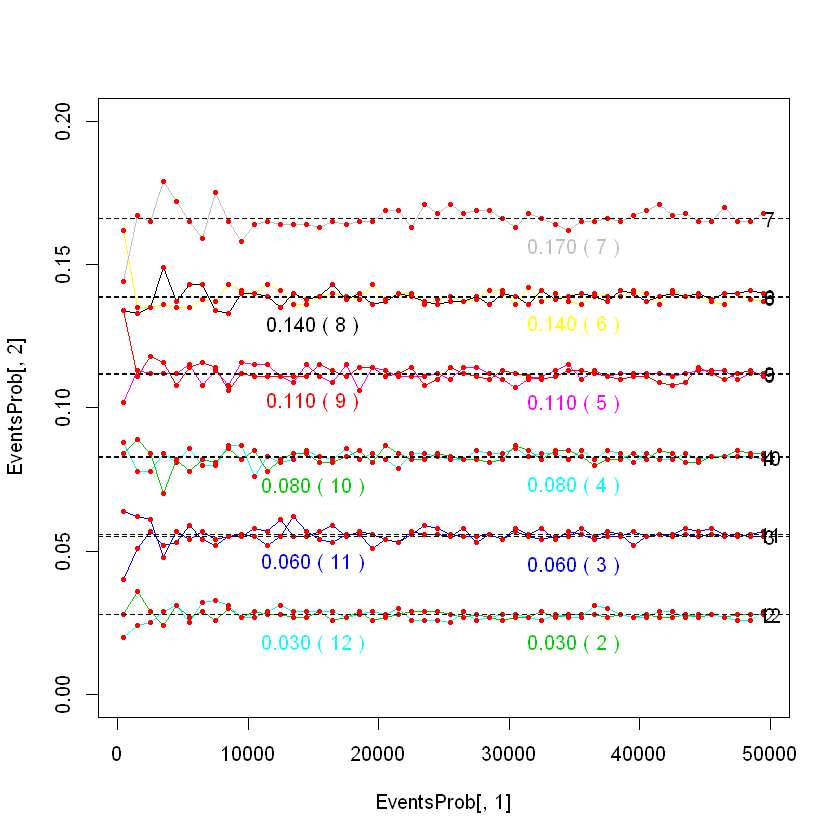

In [237]:
# Now we will make a fully detailed plot b/w samplesize and all events probability.

# making a blank plot with both axis.
plot(x= EventsProb[,1], y=EventsProb[,2], type='n', ylim=c(0,0.20))
count = 2
col_num = 2
for (i in Columns){
    count = count+1
    
    # Now we will use for loop to draw all the probability lines with points.
    lines(x=EventsProb[,1], y=EventsProb[,i], col=count)
    points(x=EventsProb[,1], y=EventsProb[,i], col=2, cex = 0.5,pch=16) # points on the prob. lines.
    abline(a=1,b=0, h=mean(EventsProb[,i]), lty=2)  # making a porb line.
    text(y=mean(EventsProb[,i]),x=50000,label=c(i))
    prob_i = format(round(mean(EventsProb[,i]),2), nsmall=3)
    if (col_num > 7){
        text(y=mean(EventsProb[,i])-0.01,x=15000,label=c(paste(prob_i,"(",i,")")),col=count)
    }
    else{
        text(y=mean(EventsProb[,i])-0.01,x=35000,label=c(paste(prob_i,"(",i,")")),col=count)
    }
    col_num = col_num+1
    
}



**Task: The addition law for mutually exclusive events states that the sum of relatve frequencies for even number should be about 50% and the sum of relative frequencies for odd numbers should be about 50%**

* **Check the sum of relative frequencies for odd numbers(1,3,5,7,9,11)**
* **Check the sum of relative frequencies for even numbers(2,4,6,8,10,12)**

In [262]:
# Sum of relative frequencies for odd numbers
# first we will get the oddEvents
oddEvents = EventsProb[,c(3,5,7,9,11)]

# Now we will sum all the Sample size, and we will bind it with SampleSizes

oddEventsr = cbind(SampleSize = EventsProb[,1], OddEventSum = rowSums(oddEvents))


NOw we will get the probability sum for even number of events.

In [263]:
# Sum of relative frequencies for odd numbers
# first we will get the oddEvents
evenEvents = EventsProb[,c(2,4,6,8,10,12)]

# Now we will sum all the Sample size, and we will bind it with SampleSizes

evenEventsr = cbind(SampleSize = EventsProb[,1], EvenEventSum = rowSums(evenEvents))

**Combining the sum of odd and even events results for each number of sample size**

In [265]:
# here we will use merge function instead of using cbind to aviod double column for SampleSize.
EventsSum = merge(oddEventsr, evenEventsr)
EventsSum = cbind(EventsSum, "OddEvenSum"= EventsSum[,2]+EventsSum[,3])
EventsSum

SampleSize,OddEventSum,EvenEventSum,OddEvenSum
500,0.484,0.516,1.000
1500,0.504,0.495,0.999
2500,0.513,0.486,0.999
3500,0.507,0.492,0.999
4500,0.502,0.497,0.999
5500,0.507,0.494,1.001
6500,0.494,0.504,0.998
7500,0.508,0.491,0.999
8500,0.489,0.510,0.999
9500,0.497,0.504,1.001


___

## Multiplication Law of Probability

Now we will see the Multiplication law probability which is one of the basic properties of probability.

For example: 
    
    A: An odd number on the first die.
    B: An odd number on the second die.
    C: An odd nember on the both die.
    
    Then the multiplication law for independent events states that: P(Event C)=P(Event A) X P(Event B).
    
This multiplication law of probability reflects the properties of relative frequency in practice. if two dice are tossed a large number of times, the relative frequencies of eventsA, B, and C should approximate the probabilities of these events. Also, the product relative frequency of A times the relative frequency of B should approximate the relative frequency of C.

* This can be stated as: Relative frequency of C = Relative frequency of A X relative frequency of B

The multiplication law for independent events states that if two envents are independents then `P(A and B) = P(A) x P(B)`.

The multiplication law for independent events is modeled on the behavior of relative frequency.

* For relative frequency, RelativeFrequency(A and B) is approximately RelativeFrequency(A) X RelativeFrequency(B). As Sample size increases, RelativeFrequency(A and B) tends to be closer to RelativeFrequency(A) X RelativeFrequency(B). 

**In this section also we will use the DicSim function with some little changes**

In [438]:
DiceSim = function(Population = c(0,1), Probability = c(0.5,0.5), from=1000, to=50000, SampleSize=2000,
                  SampleRepeat=1, SampleName='Sample'){
    
    # Generating the Sample Size for tossing of coins.
    SampleSizes = seq(from, to, SampleSize)
    
    # Now we need a vector to store all the smaple names.
    SNames = vector(length=SampleRepeat)
    
    for (j in SampleSizes){
        
        # initializing the Sample data which will store the appearence of the Samples
        SampleData = NULL
        # We need to make it NULL after every 
        for (i in 1:SampleRepeat){
            # Generating the Samples for both coins
            Sample = sample(x=Population, size= j, prob = Probability, replace = TRUE)
            
            # Now here we need to pack it by using cbind method which will be used to bind all the Samples.
            SNames[i] = paste(SampleName,i,sep='')
            
            # Now we need to bind all the sample together
             if (!exists('SampleData')){
                    SampleData = cbind(Sample)
                }

            else{
                    SampleData = cbind(SampleData,Sample)
                }
            }
        
        # Now we need to add the event result
        colnames(SampleData) = SNames
        
        # We also need get odd number apperaence for the individual dice
        
        for (CName in SNames){
            
            # Now here we need to make a vector which will contain the frequency of add numbers 
            # for each and individual dice.
            DiceData = SampleData[SampleData[,CName]%%2 != 0,CName]
            # Now after getting the individual data for each dice we need to make a table and add them.
            DiceData = table(DiceData)
            # Now we need to sum them with rowSums which will give us the frequency of appearence of odd numbers.
            
            #print(DiceData)
            #print(paste("Sum of dice odd freq: ",sum(DiceData)))
            
            DiceData = sum(DiceData)
            
            if (!exists("DiceFreq")){
                
                DiceFreq = cbind(Dice = DiceData)
            }
            else{
                DiceFreq = cbind(DiceFreq, Dicex=DiceData)
            }
            
        }
        colnames(DiceFreq) = SNames  # renaming DiceFreq columns names.
        #print(DiceFreq)
        DiceFreq2 = DiceFreq
        DiceFreq = NULL  # Now we need to make DiceFreq as NULL for another SampleSize Data
        
        
        #colnames(DiceFreq) = SNames
        
        # Now we will select only odd number of events
        SampleData = SampleData[SampleData[,'Dice1']%%2 != 0 & SampleData[,'Dice2']%%2 != 0,] 
        # selected only odd number if ther is an odd number in all dices. 
        Events = table(SampleData)
        
        # now we need to combine all the events together with sample size
        if (!exists('EventsData')){
                eventi= type.convert(format(round(Events/j, 3), nsmall = 3))
            
                EventsData = rbind(c(SampleSize=j, Events,Dice=DiceFreq2))
                # here format is used to handle the format of the decimal number
            
            }

        else{
                eventi= type.convert(format(round(Events/j, 3), nsmall = 3))
                EventsData = rbind(EventsData,c(SampleSize=j, Events,Dice=DiceFreq2))
            }
        
        
    }
    # Here Now we need to rename all the samples.
    #colnames(SampleData) = SNames  # the number of columns are equal to length of SNames.
    #SampleData = data.frame(SampleData)
    # Now to add another 
        
    EventsData
    #SampleData
}

In [465]:
EventsProb = DiceSim(Population = c(1:6), Probability = c(1/6,1/6,1/6,1/6,1/6,1/6),  SampleRepeat = 2, SampleName = "Dice",
                    from=1000, to=50000,SampleSize=1000)
EventsProb = data.frame(EventsProb)

In [466]:
head(EventsProb)

SampleSize,X1,X3,X5,Dice1,Dice2
1000,157,144,145,483,476
2000,376,316,314,984,1008
3000,507,497,534,1509,1518
4000,699,676,653,1973,2064
5000,871,839,836,2522,2542
6000,999,1004,1025,2989,2972


In [467]:
#EventsProb[EventsProb[,'Dice1']%%2 !=0 && EventsProb[,'Dice2']%%2 !=0]

In [468]:
columnNames = colnames(EventsProb)

In [469]:
for (i in 1:10){
    
    if (i%%2 == 0){
        print(paste(i, "is an even numbrer"))
    }
    else{
        print(paste(i, "is a odd number"))
    }
}

[1] "1 is a odd number"
[1] "2 is an even numbrer"
[1] "3 is a odd number"
[1] "4 is an even numbrer"
[1] "5 is a odd number"
[1] "6 is an even numbrer"
[1] "7 is a odd number"
[1] "8 is an even numbrer"
[1] "9 is a odd number"
[1] "10 is an even numbrer"


In [470]:
EventsProb$TotalEvents = EventsProb$SampleSize*2

In [473]:
colnames(EventsProb) = c(columnNames,'TotalEvents')

In [474]:
head(EventsProb)

SampleSize,X1,X3,X5,Dice1,Dice2,TotalEvents
1000,157,144,145,483,476,2000
2000,376,316,314,984,1008,4000
3000,507,497,534,1509,1518,6000
4000,699,676,653,1973,2064,8000
5000,871,839,836,2522,2542,10000
6000,999,1004,1025,2989,2972,12000


**Getting the frequency of having odd events and event 'Dice1 x Dice2'.**

In [478]:
# adding all the odd number frequency and binding them with SampleSize and TotalEvents.
OddEventsFreq = cbind(SampleSize = EventsProb$SampleSize, OddEventFreq = rowSums(EventsProb[,2:4]), 
                      TotalEvents=EventsProb$TotalEvents, 
                      MulFreq = (EventsProb$Dice1/EventsProb$SampleSize)*(EventsProb$Dice2/EventsProb$SampleSize))
head(OddEventsFreq)

SampleSize,OddEventFreq,TotalEvents,MulFreq
1000,446,2000,0.2299080
2000,1006,4000,0.2479680
3000,1538,6000,0.2545180
4000,2028,8000,0.2545170
5000,2546,10000,0.2564370
6000,3028,12000,0.2467586


**Getting the Relative Frequency for odd envents.**

In [480]:
# adding all the odd number frequency and binding them with SampleSize and TotalEvents.
OddEventsRFreq = cbind(SampleSize = OddEventsFreq[,'SampleSize'], 
                      OddEventFreq = OddEventsFreq[,"OddEventFreq"]/OddEventsFreq[,'TotalEvents'], 
                      TotalEvents=OddEventsFreq[,'TotalEvents'], MulFreq = OddEventsFreq[,"MulFreq"])
head(OddEventsRFreq)

SampleSize,OddEventFreq,TotalEvents,MulFreq
1000,0.2230000,2000,0.2299080
2000,0.2515000,4000,0.2479680
3000,0.2563333,6000,0.2545180
4000,0.2535000,8000,0.2545170
5000,0.2546000,10000,0.2564370
6000,0.2523333,12000,0.2467586


**Getting Error in b/w Relative frequency of P(A and B) = P(A) x P(B)**

In [481]:
OddEventsRFreq = cbind(OddEventsRFreq, Errors = OddEventsRFreq[,"OddEventFreq"]-OddEventsRFreq[,'MulFreq'])
head(OddEventsRFreq)

SampleSize,OddEventFreq,TotalEvents,MulFreq,Errors
1000,0.2230000,2000,0.2299080,-0.006908000
2000,0.2515000,4000,0.2479680,0.003532000
3000,0.2563333,6000,0.2545180,0.001815333
4000,0.2535000,8000,0.2545170,-0.001017000
5000,0.2546000,10000,0.2564370,-0.001836960
6000,0.2523333,12000,0.2467586,0.005574778


**Making the chart b/w SampleSize and OddEvents relative frequency.**

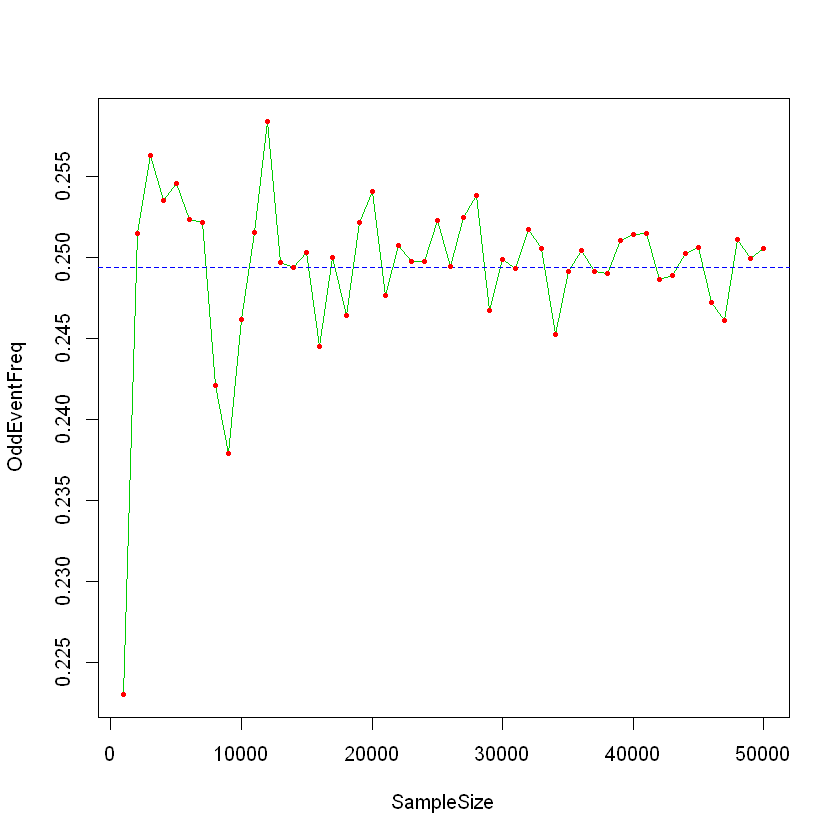

In [489]:
plot(OddEventsRFreq[,"SampleSize"], OddEventsRFreq[,"OddEventFreq"], type='l', col=3,
    xlab='SampleSize', ylab="OddEventFreq")
abline(a=1,b=0,h=mean(OddEventsRFreq[,"OddEventFreq"]), lty=2, col=12)
points(OddEventsRFreq[,"SampleSize"], OddEventsRFreq[,"OddEventFreq"], pch=16, col=2, cex=.5)

**Plotting chart with Errors and SampleSize**

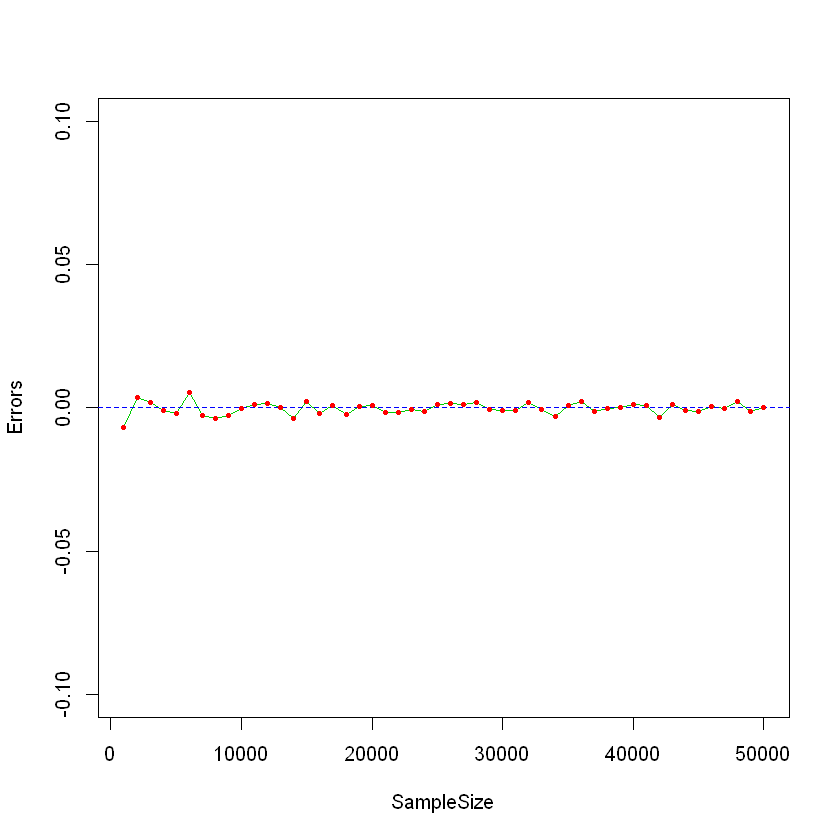

In [493]:
plot(OddEventsRFreq[,"SampleSize"], OddEventsRFreq[,"Errors"], type='l', col=3, ylim=c(-0.1,0.1),
    xlab='SampleSize', ylab="Errors")
abline(a=1,b=0,h=0.00, lty=2, col=12)
points(OddEventsRFreq[,"SampleSize"], OddEventsRFreq[,"Errors"], pch=16, col=2, cex=.5)

In [496]:
OddEventsRFreq[OddEventsRFreq[,"Errors"]<=0.001,]

SampleSize,OddEventFreq,TotalEvents,MulFreq,Errors
1000,0.2230000,2000,0.2299080,-0.0069080000
4000,0.2535000,8000,0.2545170,-0.0010170000
5000,0.2546000,10000,0.2564370,-0.0018369600
7000,0.2521429,14000,0.2548804,-0.0027375510
8000,0.2421250,16000,0.2458864,-0.0037613750
9000,0.2378889,18000,0.2406114,-0.0027224815
10000,0.2462000,20000,0.2462136,-0.0000136300
13000,0.2496923,26000,0.2493458,0.0003465089
14000,0.2493571,28000,0.2531142,-0.0037570714
16000,0.2445000,32000,0.2463880,-0.0018880430


## Conditional probability

**Task: Suppose that a child has a toy train that requires six 'C' battries to run. The child has acccidentally mixed four good batteries with two bad batteries. if we were to randomly select two of the six batteries without replacement, the ood of getting a bad battery are conditionally determined.**

* Let's assume that the first barttery chosen is bas (Event A)  and the second battery chosen is good (Event B). The two selection fo the two batteries are dependent events.

* The probability of event B has two differnt values depending upon whether  or not event  A occures. 
* If event A occurs, then there are four good batteries among the remaining five batteries, and the probability of event B is 4/5. 
* if a battery is chosen and event A does not occur, then there are only three good batteries remaining among the five batteries, and the probability fo B is 3/5.
* Conditional probabilities are related to joint probabilities and marginal probabilities. This relationship can be illustrated by follwing example:
    * Consider a sample space that contains all pairs of batteries selected from the six batteries without replacement. 

Now here we will make a sample space of choosing 'Good' and 'Dead' batteries by using the matirx. we can do this thing by using the rbind method inside the for loop but we will see the simple approach.

In [125]:
# creating the chooice sample.
choice1 = matrix(c(1:6), nrow=6, ncol=6)
choice2 = t( matrix(c(1:6), nrow=6, ncol=6))

In [126]:
choice1

1,1,1,1,1,1
2,2,2,2,2,2
3,3,3,3,3,3
4,4,4,4,4,4
5,5,5,5,5,5
6,6,6,6,6,6


In [127]:
choice2

1,2,3,4,5,6
1,2,3,4,5,6
1,2,3,4,5,6
1,2,3,4,5,6
1,2,3,4,5,6
1,2,3,4,5,6


In [128]:
events = matrix(c(1,1,1,1,1,1), nrow=6, ncol=6)
events

1,1,1,1,1,1
1,1,1,1,1,1
1,1,1,1,1,1
1,1,1,1,1,1
1,1,1,1,1,1
1,1,1,1,1,1


In [129]:
colnames(events)  = c("DEAD1", "DEAD2", "GOOD1", "GOOD2", "GOOD3", "GOOD4")
rownames(events) = c("DEAD1", "DEAD2", "GOOD1", "GOOD2", "GOOD3", "GOOD4")

In [130]:
# Now we will encode our in which we will choose a battery without replacement
for (i in 1:6){
    
    for (j in 1:6){
        
        if (choice1[i,j] == choice2[i,j]){
            events[i,j]=0
        }
    }
}

In [131]:
events

,DEAD1,DEAD2,GOOD1,GOOD2,GOOD3,GOOD4
DEAD1,0,1,1,1,1,1
DEAD2,1,0,1,1,1,1
GOOD1,1,1,0,1,1,1
GOOD2,1,1,1,0,1,1
GOOD3,1,1,1,1,0,1
GOOD4,1,1,1,1,1,0


Note: Not the in above matrix diagonal having 0 values because we are selecting items without replacement. if we have selected 'DEAD1' in first choice then we can choose 'DEAD1' again in second choice.

* **Columns heading shows the first choice with second choice.**
* **Rows heading shows the second choice with first choice.** 

Now we need to caculate the marginal probability for first and second choice by checking that first choice is 'DEAD' or 'GOOD'.

In [132]:
events = data.frame(events)

In [133]:
events

,DEAD1,DEAD2,GOOD1,GOOD2,GOOD3,GOOD4
DEAD1,0,1,1,1,1,1
DEAD2,1,0,1,1,1,1
GOOD1,1,1,0,1,1,1
GOOD2,1,1,1,0,1,1
GOOD3,1,1,1,1,0,1
GOOD4,1,1,1,1,1,0


In [134]:
FirstDead = rowSums(events[,c(1,2)])

In [135]:
FirstDead

DEAD1 DEAD2 GOOD1 GOOD2 GOOD3 GOOD4 
    1     1     2     2     2     2

In [136]:
FirstGood = rowSums(events[,c(3:6)])

In [137]:
FirstGood

DEAD1 DEAD2 GOOD1 GOOD2 GOOD3 GOOD4 
    4     4     3     3     3     3

In [138]:
events = cbind(FirstDead, FirstGood)

In [139]:
SecondDead = colSums(events[1:2,])
SecondDead

FirstDead FirstGood 
        2         8

In [140]:
SecondGood = colSums(events[3:6,])

In [141]:
SecondGood

FirstDead FirstGood 
        8        12

In [142]:
JointEvents = rbind(SecondDead, SecondGood)

In [143]:
JointEvents

,FirstDead,FirstGood
SecondDead,2,8
SecondGood,8,12


**Finally we have got the joint event with there join appearence Now by divinding them 30(total number of events) we will find out the probability.** 

In [144]:
JointEvents = round(x=JointEvents/30, 3)

In [145]:
JointEvents

,FirstDead,FirstGood
SecondDead,0.067,0.267
SecondGood,0.267,0.400


In [146]:
sum(JointEvents)

[1] 1.001

Now from above output we can see the joint probability for both choices.  

In [149]:
JointEvents = rbind(JointEvents,MGPSB= colSums(JointEvents))
JointEvents = cbind(JointEvents,MGPFB= rowSums(JointEvents))

In [150]:
JointEvents

,FirstDead,FirstGood,MGPFB
SecondDead,0.067,0.267,0.334
SecondGood,0.267,0.400,0.667
MGPSB,0.334,0.667,1.001


**`Note:` Now until this we have seen this a theoritical approach for the conditionaly probability from now we will see the simulation approach**

The conditional probabilities are theoretical probabilitiers assigned to the events by making use of the definition of probability for equally likely events.

* if these conditional probabilities are reasonable, they should reflect what happen in practice.
* Consequently, given a large number of replications in which two batteries are selected from a group of six batteries.(in which two of the batteries are dead.) 

Now we need to make our Population which is ("DEAD1", "DEAD2", "GOOD1", "GOOD2", "GOOD3", "GOOD4").

In [151]:
Population = c("DEAD1", "DEAD2", "GOOD1", "GOOD2", "GOOD3", "GOOD4")

all have the probability equally likely to be choosen.

In [154]:
rep(1,2)

[1] 1 1

In [157]:
# generating a sample of choosing two batteries without replacement.
choice = sample(x=Population, prob=rep(1/6,6), size=2 ) 



In [158]:
choice

[1] "GOOD3" "GOOD4"

In [166]:
Population = c(0, 0, 1, 1, 1, 1)
Population

[1] 0 0 1 1 1 1

In [233]:
# Now we will do this thing for 100 times by using a for loop
Population = c(0, 0, 1, 1, 1, 1)
Choices=NULL
for (i in 1:100){
    
    choice = sample(x=Population, prob=rep(1/6,6), size=2 ) 

    if (!exists('Choices')){

        Choices = rbind(choice)
    }
    else{
        Choices = rbind(Choices,choice)
    }

}

# chekcing the Choices
rownames(Choices) = 1:length(Choices[,1])
colnames(Choices) = c("FirstBattery", "SecondBattery")
head(Choices)

FirstBattery,SecondBattery
1,0
0,1
1,1
1,0
0,1
0,1


**making a function for above code**

In [239]:
GenAttempts = function(Pop, prob, choices = 2, size=100){
    
    # Pop means polulation, prob means probability, size mean slecting items from population.
    
    # Creating a variable to store all the GenAttempts
    
    Choices=NULL
    for (i in 1:size){

        choice = sample(x=Pop, prob=prob, size=choices ) 

        if (is.null(Choices)){

            Choices = rbind(choice)
        }
        else{
            Choices = rbind(Choices,choice)
        }

    }

    # chekcing the Choices
    rownames(Choices) = 1:length(Choices[,1])
    colnames(Choices) = c("FirstBattery", "SecondBattery")
    Choices
}

In [242]:
#GenAttempts(Pop= c(0,0,1,1,1,1),prob = rep(1/6,6),size= 100)

In [169]:
# Now we need to check the dimension of the Choices
dim(Choices)

[1] 100   2

In this we have 100 rows and 2 columns.

In [171]:
# we need the value of total number of rows to check the frequecncy of corresponding event.
attempts = dim(Choices)[1]
print(paste("Total attempts",attempts))

[1] "Total attempts 100"


**Tasks:**

1. First battery is Dead and second is Good (FDSG)
2. First battery is Good and second is Dead (FGSD)
3. Both the batteries are Dead (FDSD)
4. Both the batteries are Good. (FGSG)

**Now we will see above result and match them with our theoritical probabilities.**

In [174]:
# Now we will secect only those rows in which 1 means good battery and 0 means bad battery.
FDSG = Choices[Choices[,'FirstBattery'] == 0 & Choices[,'SecondBattery']==1,]
FGSD = Choices[Choices[,'FirstBattery'] == 1 & Choices[,'SecondBattery']==0,]
FDSD = Choices[Choices[,'FirstBattery'] == 0 & Choices[,'SecondBattery']==0,]
FGSG = Choices[Choices[,'FirstBattery'] == 1 & Choices[,'SecondBattery']==1,]

In [258]:
AllEvents = function(AllAttempts,Echoices=c('FirstBattery','SecondBattery')){
    FDSG = AllAttempts[AllAttempts[,Echoices[1]] == 0 & AllAttempts[,Echoices[2]]==1,]
    FGSD = AllAttempts[AllAttempts[,Echoices[1]] == 1 & AllAttempts[,Echoices[2]]==0,]
    FDSD = AllAttempts[AllAttempts[,Echoices[1]] == 0 & AllAttempts[,Echoices[2]]==0,]
    FGSG = AllAttempts[AllAttempts[,Echoices[1]] == 1 & AllAttempts[,Echoices[2]]==1,]
    
    #AEvents = list(FDSG,FGSD,FGSG, FDSD)
    #EventNames = c("FDSG","FGSD","FGSG", "FDSD")
    
    allEvents = list(FDSG,FGSD,FGSG, FDSD)
    allEvents
}

**checking all the values**

In [176]:
head(FDSG)

,FirstBattery,SecondBattery
15,0,1
18,0,1
24,0,1
25,0,1
28,0,1
31,0,1


In [177]:
head(FGSD)

,FirstBattery,SecondBattery
2,1,0
3,1,0
5,1,0
6,1,0
10,1,0
13,1,0


In [178]:
head(FGSG)

,FirstBattery,SecondBattery
1,1,1
4,1,1
7,1,1
8,1,1
9,1,1
11,1,1


In [179]:
head(FDSD)

,FirstBattery,SecondBattery
16,0,0
26,0,0
33,0,0
81,0,0


**Now we need to count the frequency of apperaence of all four conditions.**

In [188]:
AEvents = list(FDSG,FGSD,FGSG, FDSD)
EventNames = c("FDSG","FGSD","FGSG", "FDSD")

In [207]:
ApFreq = NULL
class(ApFreq)

[1] "NULL"

In [212]:
is.null(ApFreq) 

[1] TRUE

In [230]:
count = 0
ApFreq = NULL
for (i in AEvents){
    count = count +1 
    # Now we will count all the events frequency in simulation
    
    if (is.null(ApFreq)){
        # if Apfreq is null then we will add the total number of events with first event frequency
        ApFreq = cbind(Tevents=100, xevent=dim(i)[1])
        
    }
    else{
        ApFreq = cbind(ApFreq, xevent=dim(i)[1])
    }
    
}to

# renaming all the events
colnames(ApFreq) = c("TotalAttempts",EventNames)
ApFreq

TotalAttempts,FDSG,FGSD,FGSG,FDSD
100,24,29,43,4


In [255]:
# makign Apperance frequency function
ApFrequency = function(allevents, eventsattempts){
    
    count = 0
    ApFreq = NULL
    EventNames = c("FDSG","FGSD","FGSG", "FDSD")
    for (i in allevents){
        count = count +1 
        # Now we will count all the events frequency in simulation

        if (is.null(ApFreq)){
            # if Apfreq is null then we will add the total number of events with first event frequency
            ApFreq = cbind(Tevents=eventsattempts, xevent=dim(i)[1])

        }
        else{
            ApFreq = cbind(ApFreq, xevent=dim(i)[1])
        }

    }

    # renaming all the events
    colnames(ApFreq) = c("TotalAttempts",EventNames)
    
    ApFreq
}

**Now we need put all the above code into a single function**

In [287]:
batteryAttempts = function(Pop, prob, from=100,to=5000,size=100, choices=2){
    set.seed(13579)
    # Now first of all we need to make the sequence
    Attempts = seq(from=from, to=to, size)
    
    allEventData = NULL  # to store all events frequency record.
    # Now after this we need to iterate over Attempts and need to make sample for each attemptsize
    
    for (attmp in Attempts){
        
        # Now we will use GenAttempts function to get all the attempts 
        choice_attempts = GenAttempts(Pop= Pop,prob = prob,size= attmp, choices = choices)
        
        # Now we have choice_attempts so now we need to get all the events.
        all_events = AllEvents(choice_attempts)
        
        # Now we need to count apperance frequnecy for all evnets.
        frequency = ApFrequency(all_events, eventsattempts=attmp)
        
        # Now we need to append all the result by using rbind.
        # since from now all the steps going to repeat.
        
        if (is.null(allEventData)){
            allEventData = rbind(frequency)
        }
        else{
            allEventData = rbind(allEventData, frequency)
        }
    }
    allEventData = data.frame(allEventData)
    allEventDataRF  = cbind(Attempts=allEventData$TotalAttempts, round(x=allEventData[,2:5]/allEventData[,1], 3))
}

In [288]:
batterychoices = batteryAttempts(Pop=c(0,0,1,1,1,1), prob=rep(1/6, 6), from=100, to=10000, size=100, choices=2)
batterychoices

Attempts,FDSG,FGSD,FGSG,FDSD
100,0.240,0.250,0.410,0.100
200,0.265,0.300,0.395,0.040
300,0.263,0.267,0.383,0.087
400,0.268,0.258,0.412,0.062
500,0.266,0.282,0.380,0.072
600,0.253,0.228,0.445,0.073
700,0.286,0.291,0.371,0.051
800,0.276,0.285,0.385,0.054
900,0.259,0.271,0.401,0.069
1000,0.240,0.273,0.424,0.063


In [289]:
JointEvents

,FirstDead,FirstGood,MGPFB
SecondDead,0.067,0.267,0.334
SecondGood,0.267,0.400,0.667
MGPSB,0.334,0.667,1.001


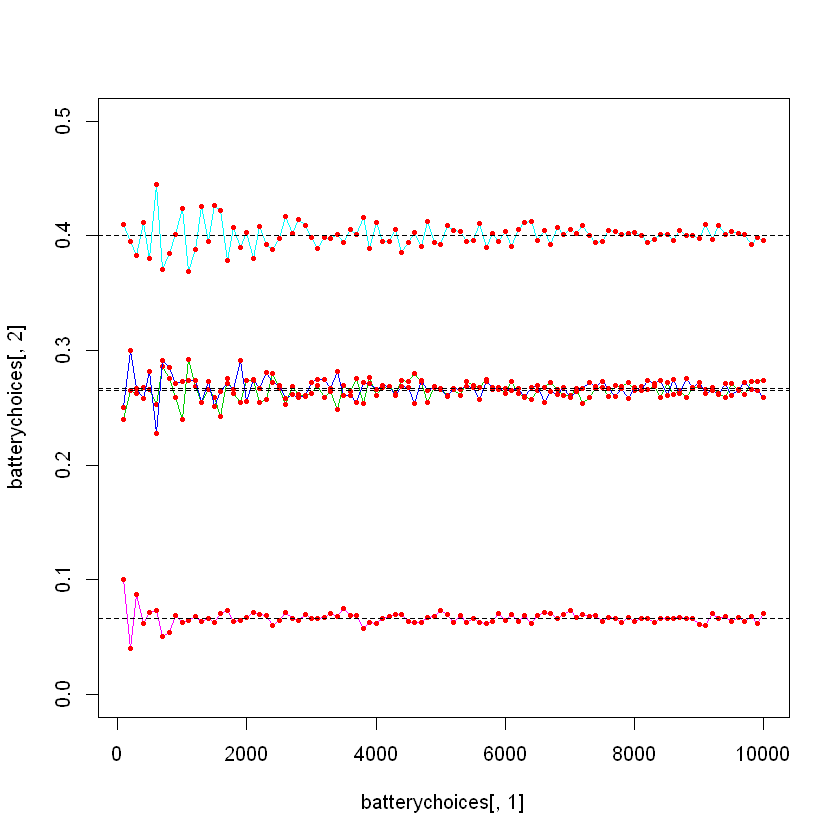

In [293]:
# Now we will make a fully detailed plot b/w samplesize and all events probability.

# making a blank plot with both axis.
plot(x= batterychoices[,1], y=batterychoices[,2], type='n', ylim=c(0,0.5))
count = 2
col_num = 2
EventNames = c("FDSG","FGSD","FGSG", "FDSD")
for (i in EventNames){
    count = count+1
    
    # Now we will use for loop to draw all the probability lines with points.
    lines(x=batterychoices[,1], y=batterychoices[,i], col=count+8)
    points(x=batterychoices[,1], y=batterychoices[,i], col=2, cex = 0.5,pch=16) # points on the prob. lines.
    abline(a=1,b=0, h=mean(batterychoices[,i]), lty=2)  # making a porb line.
    
    #text(y=mean(EventsProb[,i]),x=50000,label=c(i))
    #prob_i = format(round(mean(EventsProb[,i]),2), nsmall=3)
    col_num = col_num+1
    
}


## Combination and Permutations

Probability theory helps us to determine characterstics of a population from a random sample. A random sample is chosen so that every object, event, or individual in the population has an equal chnace of being selected.

The probability that the object, event, or individual will be selected is based upon the relative frequency of occurence of the object, envent, or individual in the propulation.

        For example:
            
            IF population consisted of 1,000 individuals with 700 mens and 300 womens. then the probability of selecting a male is .70% and selecting the women is .30%.


**Probability theory operates under seven fundamental rules.**

1. The probability of a single event occurring in a set of equally likely events is one divided by the number of events.
    * For example: a single marble from a set of 100 marbles ahs 1/100 chance of being selected.
    * P(single event) = 1/N
    
2. if there is more than one event in a group, then the probability of selecting an event from the group is equal to the group frequency divided by the number of events.
    * For example: a set of 100 marbles contian 29 red,5 green, 20 yellow, and 10 black. The probabillity of picking a black marble is 10/100 or 1/10.
    * P(Group|Single event) = group frequency/N

3. The probability of an event ranges b/w 0 and 1, ther is no negative probabilities and no probabilities greater than 1, probability ranges b/w 0 and 1 in equally likely chance events.

4. The sum of the probabilities in a population equal one, the sum of all frequencies of occurrence equal 1.

5. The probability of an event occuring plus the probability of an event not occuring is equal to one. if probability of selecting a black marble is 1/10, then the probability of not selecting a black marble is 9/10. (*P + Q = 1*)
    * where P = probability
    * Q = 1- probability


6. `Addition law of probability:`The probability  that any one event from a set of mutually exclusive events will occur is the sum of porbabilities.
    * The probability of selecting a black marble (10/100) or yellow marble (20/100)  is the sum of their individual probabilities.
    * P(B or Y) = P(B) + P(Y)
    
7. `Multiplication law of probability:`The probability that a combination of independent events will occur is the product of their separate probabilities.
    * Assuming sampling with replacement, the probability that a yellow marble will be selected the first time (2/10) and the probability that a yellow marble will be selected the second time (2/10) combine by multiplication to produce the probabiltiy of getting a yellow marble on both selection.
    * p(Y and Y) = p(Y) x p(Y)

___

### Birthday Problem

In birthday problem we will check that randomaly chosen two man or women have common birthday or not. for this we will make a simulation program in which we will selecet randomaly from 2 to 50 in  each iteration. we will generate 1000 sample to get the better result.

**Steps:**

1. First we need to generate to vector numPeople or replicationSize. numPeople contain the number of people to be choosen in a each iteration and replicationSize define the total sample size or we can say that how many times we have seleted people on same numPeople.

2. After generating the seq for numPeople and replication we need to make sample of number of randomaly selected people events.
3. Now we need to calculate that how many time we have duplicate in our randomaly selected .
4. Now we will count occurance of duplicate with each iteration.
5. Now after loop we need to devide the total numbero of occurance of duplicate we need to devide it with total number of iteration or replication value.
6. Now we have the probability of having duplicate in a given samplesize.

Note: Probability of having common birthday will increase by increasing then number of samplesize.

Note: we will make function for each steps so we can avoide any mistakes. or also to avoid the too much complex fucntoin structure.

**Task:1 Generating numPeople and replication vector**

In [1]:
numPeople = c(1:50) # we will choose up to 50 men 
replicationSize = 1000 # we will generate 1000 selection from a sample
Population = c(1:365)  # we have total 365 day (birthdates.) 

In [19]:
# This problem can be taken in different case but in this we will have a class of 30 student.\
StudentClassSize = sample(x=c(1:365), prob=rep(1/365,365), size=30, replace=TRUE)

In [21]:
print(StudentClassSize)

 [1] 243 231  11  99 128 308 232 172 262 247   1  22 173 315  28 167 141  27  23
[20] 205 145 211 355 341 211 361  93 153 214 132


**Task:2 Now we need to generate a sample for each iteration.**

first we will test our code then we will put it into a function.

In [85]:
# generating sample for selection two birthday date.

# Now we need to make a for loop to run 1000 time to generate a sample of choosen bdays.
Probfactor = length(StudentClassSize)
Duplication = vector(length= replicationSize)  # to store the values of True or False of having duplicate in a sample 
for (i in 1:replicationSize){
    
    StudentClassSize = sample(x=Population, prob=rep(1/365,365), size=30, replace=TRUE)

   # Now we need check that we have any duplicate or not
    DupResult = duplicated(StudentClassSize)
    
    # Now if we have any duplicate then we need to count it and we need to put into the duplication vector
    Duplication[i] = any(DupResult)
}
# **Now we need to get the frequency of getting duplicate**
# deviding the sum of Duplication with total number of repitation.
DupFreq = sum(Duplication)/replicationSize
DupFreq

[1] 0.704

**Now we will put the above code into a function**

In [86]:
DuplicateFreq = function(Population, SampleSize=30, replicationSize=1000){
    
    # Population: it the population of all the birthday dates form 1 to 365
    # SampleSize: it the size of sample which defines that how many people will be selected from the population
    
    # Now we need a vector which will store the duplication result TRUE , FALSE values.
    Duplication = vector(length= SampleSize)
    
    # Now we need to  run the for loop 
    
    for (i in 1:replicationSize){
        
        PeopleSample = sample(x=Population, prob=rep(1/365,365), size=SampleSize, replace=TRUE)

       # Now we need check that we have any duplicate or not
        DupResult = duplicated(PeopleSample)

        # Now if we have any duplicate then we need to count it and we need to put into the duplication vector
        Duplication[i] = any(DupResult)
               
    }
    
    # Now we need to return the final relative frequency of duplication.
    # **Now we need to get the frequency of getting duplicate**
    # deviding the sum of Duplication with total number of repitation.
    DupFreq = sum(Duplication)/replicationSize
    DupFreq
}

**testing our code**

In [88]:
DuplicateFreq(Population=Population)

[1] 0.687

Our code is working great, now we need to move on next step.

**Generate the relative frequency of having duplicate of 2 values form 5 to 60 number of people samplesize**  

Now we need to run a loop on the DuplicateFreq function which will give us the probability of having duplicate with corresponding sample size

In [92]:
# running for loop in a seq of 5 to 60 with a step of 5.
SampleSizes = seq(0, 60, 5)
Dupdata = NULL
for (i in SampleSizes){
    
    result = DuplicateFreq(Population=Population, SampleSize = i)
    
    # now we need to store the result with corresponding SampleSizes.
    
    if (is.null(Dupdata)){
        
        # if Dupdata is null then we need to intiate it.
        Dupdata = rbind(c(SampleSize=i, Pobability_of_common_Bday=result))
    }
    else{
        Dupdata = rbind(Dupdata, c(SampleSize=i, Pobability_of_common_Bday=result))
    }
    
}

In [93]:
Dupdata

SampleSize,Pobability_of_common_Bday
0,0.000
5,0.033
10,0.123
15,0.246
20,0.439
25,0.541
30,0.698
35,0.793
40,0.880
45,0.940


**puting the above code into a single funciton `BdaySim`**

In [101]:
BdaySim = function(Population, SampleSizes , replicationSize = 1000){

    # SampleSizes can be a single value of smaple size or a vector type array.

Dupdata = NULL  # an vector to store the all the finale result.
for (i in SampleSizes){
    
        result = DuplicateFreq(Population=Population, SampleSize = i, replicationSize=replicationSize)

        # now we need to store the result with corresponding SampleSizes.

        if (is.null(Dupdata)){

            # if Dupdata is null then we need to intiate it.
            Dupdata = rbind(c(SampleSize=i, Pobability_of_common_Bday=result))
        }
        else{
            Dupdata = rbind(Dupdata, c(SampleSize=i, Pobability_of_common_Bday=result))
        }

    }
    # Now we need to return the final result
    Dupdata
}

In [102]:
Bdayresult = BdaySim(Population=Population, SampleSizes = seq(0,150,5), replicationSize = 10000)

In [103]:
Bdayresult

SampleSize,Pobability_of_common_Bday
0,0.0000
5,0.0243
10,0.1193
15,0.2541
20,0.4080
25,0.5657
30,0.7043
35,0.8180
40,0.8992
45,0.9438


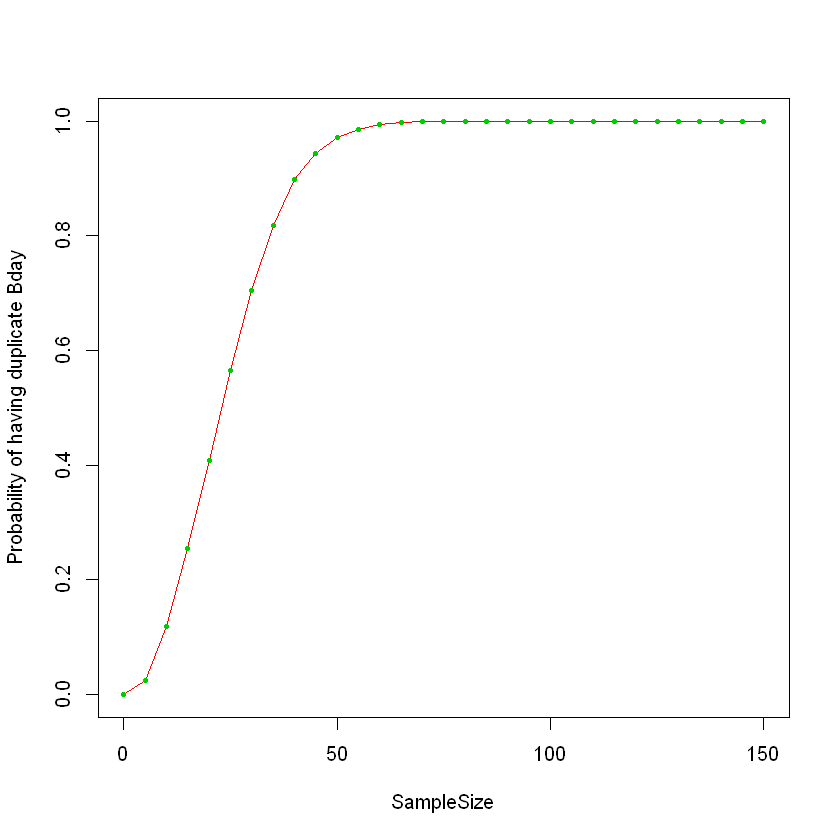

In [112]:
plot(Bdayresult, type='l', col=2, xlab="SampleSize", ylab="Probability of having duplicate Bday")
points(Bdayresult, pch=16, cex=.5, col=3)